# FINM 36700 - Homework8 Group C 8
### Yumeng Zhang, Xuran Wang, Yanjin Wu, Hengxu Zhu

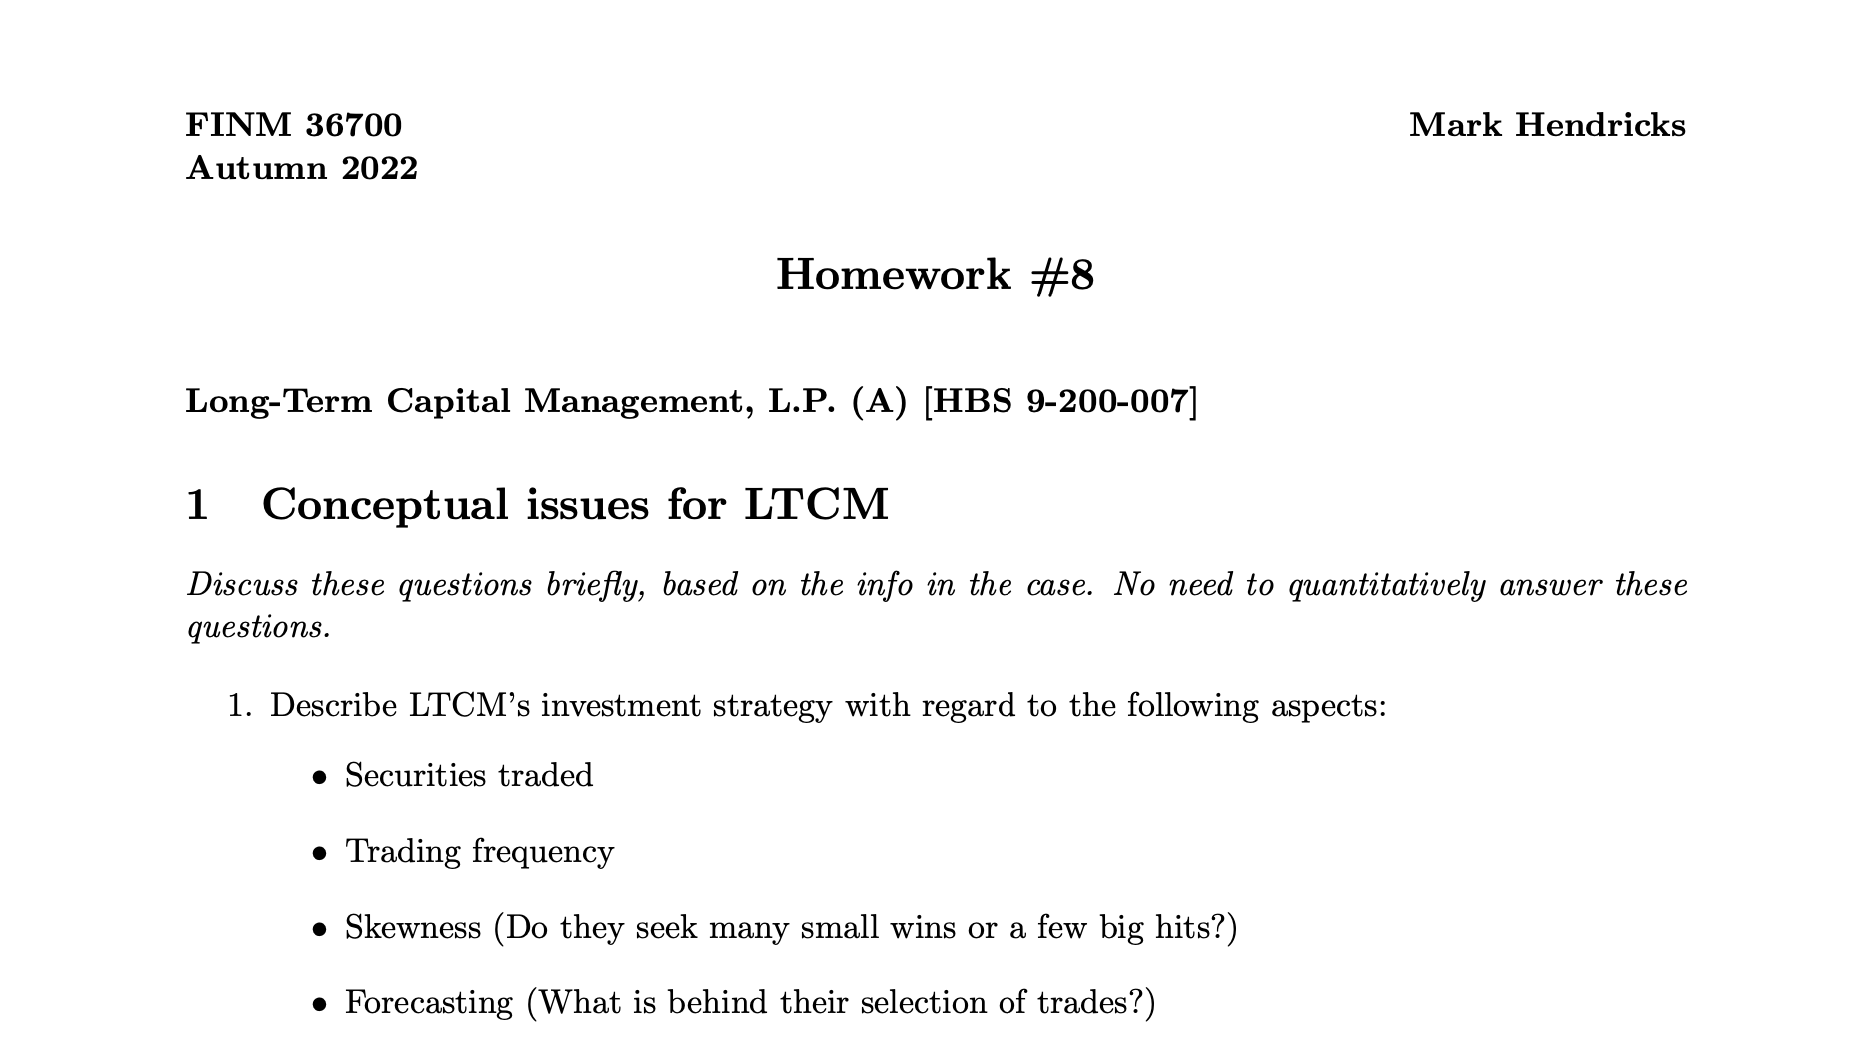

**Securities traded**

LTCM trades in a wide range of securities. They are heavily involved in fixed income and credit, and have a sizeable position in equities. Across all of these asset classes, they trade a large number of securities across global markets.

**Trading frequency**

The frequency of LTCM trades varies as they accommodate a wide range of strategies. Their largest bucket, the convergence trade, usually takes weeks and months to converge. In general, they are a medium-term frequency thing. By and large, they are not trying to arbitrage intraday moves, nor are they making long-term directional bets.

**Skewness**

LTCM is largely trying to capture a small premium in aggregated trades, which limits the upside of any individual trade, and given all the leverage, it leaves a lot of downside. Of course, if they were properly diversified, aggregating all of their trades together would lead to positive skewness. However, we expect their typical trades to have a small positive average and a large negative skewness.

**Forecasting**

LTCM does not make directional forecasts for most of their trades. Instead, they are trading spreads and pairs, predicting relative convergence rather than absolute levels. In this sense, they do not rely on complex forecasting models for the entire market, but rather rely on models to predict the size and speed of relative convergence in a given market.

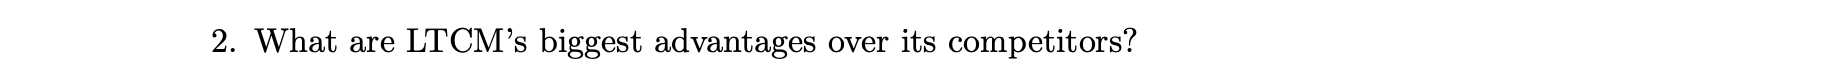

1. **Efficient financing:** LTCM gets very favorable terms on all financing, which is even zero deductions sometimes. The outlay is small if any.

2. **Fund size:** There is market power even in the large markets of institutional wholesaling.

3. **Liquidity:** LTCM has established a number of mechanisms to ensure liquidity.

4. **Long-term horizon:** LTCM takes a relatively long-term view when it comes to financing and evaluating trades.

5. **Hedged:** LTCM avoids taking excessive default risk or explicit directional bets.

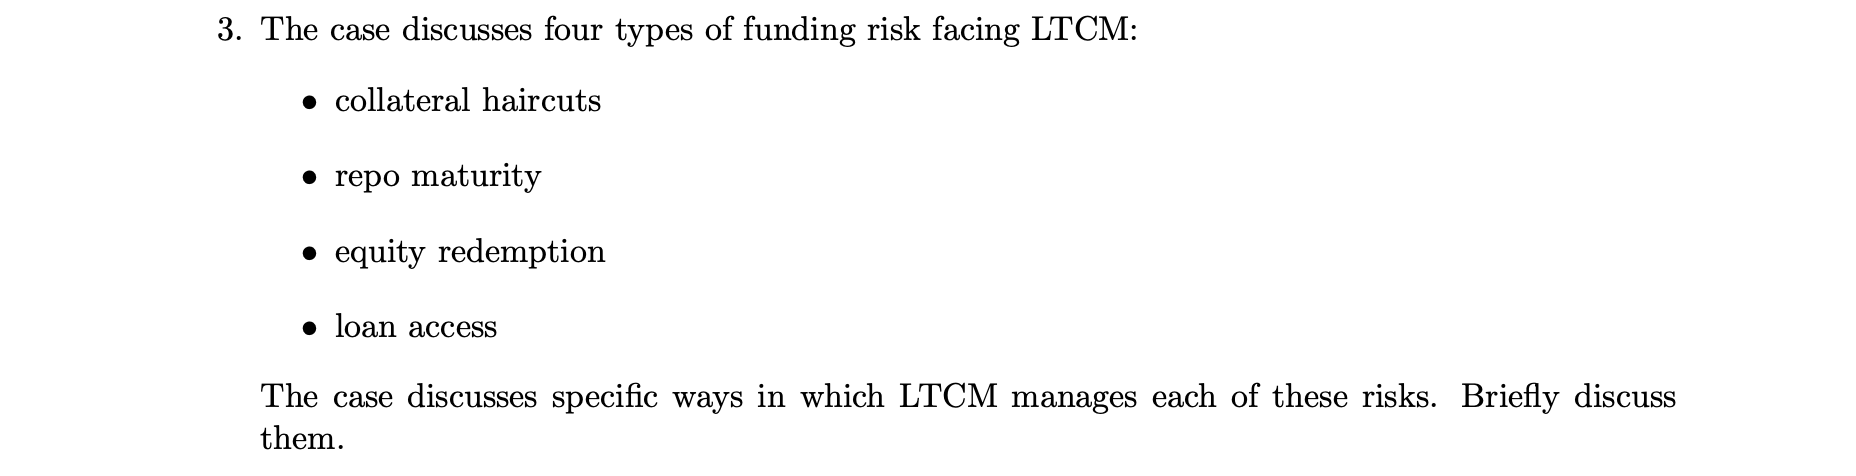

**collateral haircuts**

LTCM obtains 100% financing on a fully collateralized basis for most of the trades. Furthermore, LTCM stress tests the haircuts across its asset classes.

**repo maturity**

LTCM enters into a relatively long-maturity repo, which is unusual. While most are overnight, LTCM uses contracts that typically have a 6-12 month maturity. In addition, LTCM manages their aggregate repo maturity.

**equity redemption**

The firm is highly leveraged, so equity funding risk is particularly important. Year by year, LTCM limits redemptions of equity. This restriction is particularly strong because unredeemed money is relocked. They also spread the redemption window throughout the year to ensure that the possibility of immediate withdrawal of a majority of equity never arises.

**loan access**

LTCM has negotiated a revolving loan with no Material Adverse Change clause for debt funding. Therefore, the availability of debt funding is not highly correlated with the performance of the fund.

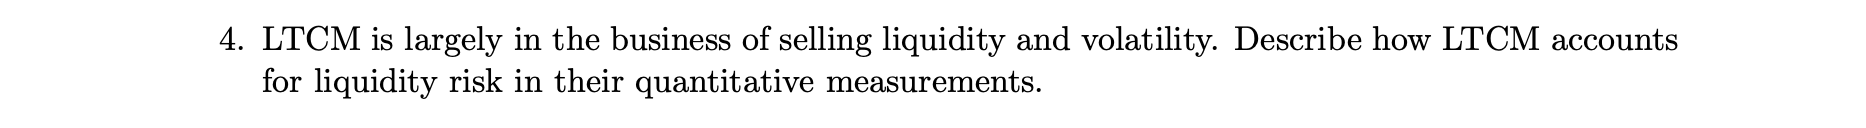

LTCM attempts to quantify liquidity risk by adjusting for the correlation of securities. For the short term, LTCM assumes a positive correlation between all trading categories. Even if their net exposure to a strategy flips, they still assume a positive correlation with the new net position.

Given LTCM's efforts to hedge apparent market risk, there are many strategies that appear to be zero correlated. However, LTCM believes that liquidity issues can lead to a positive correlation for efficient trading.

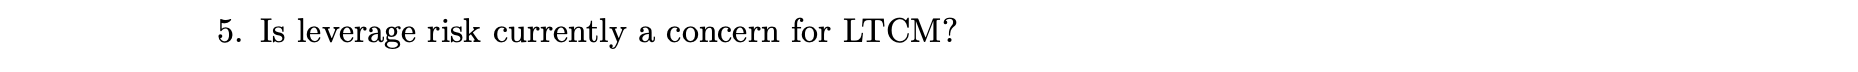

Leverage does not appear to be particularly dangerous at this time. The fund's volatility is relatively low and its VaR is relatively low, not very high relative to the rest of the industry. 

In addition, the firm actively manages its capital exposures, which means it should be able to handle the natural risks of a high leverage ratio. At the time of this case, the firm was attempting to determine whether it wanted to increase its leverage ratio further. Subsequently, at the end of 1997, the fund returned approximately one-third of its $7.5 billion in equity capital to investors. The fund blew up less than a year later, but it is hard to see the leverage risk from the time of this case.

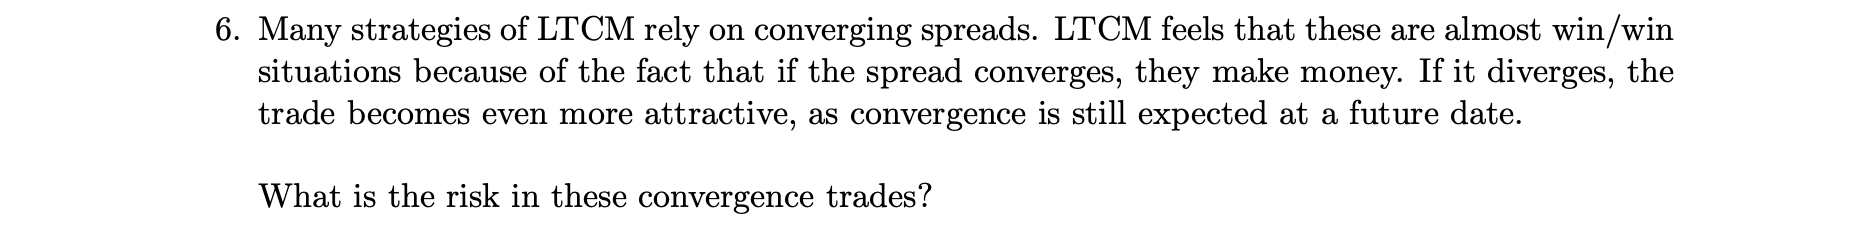

Positions are subject to liquidity risk. If market liquidity dries up or the market becomes segmented, divergent spreads can persist for a long time. This did happen to LTCM later. The trades that got them into trouble eventually paid off, but not before LTCM blew up. LTCM felt that it could exit if these converging trades became too unprofitable. 

However, a stop-loss order is not the same as a put option. It is invalid if the price does not continuously jump over the stop loss. Or the market may become paralyzed illiquid while trying to execute the stop loss. Put options don't need to worry about the price impact, whereas stops do. A stop loss ensures that the investor sells as soon as the price of the security reaches a worst-case scenario, ensuring unfavorable market timing.

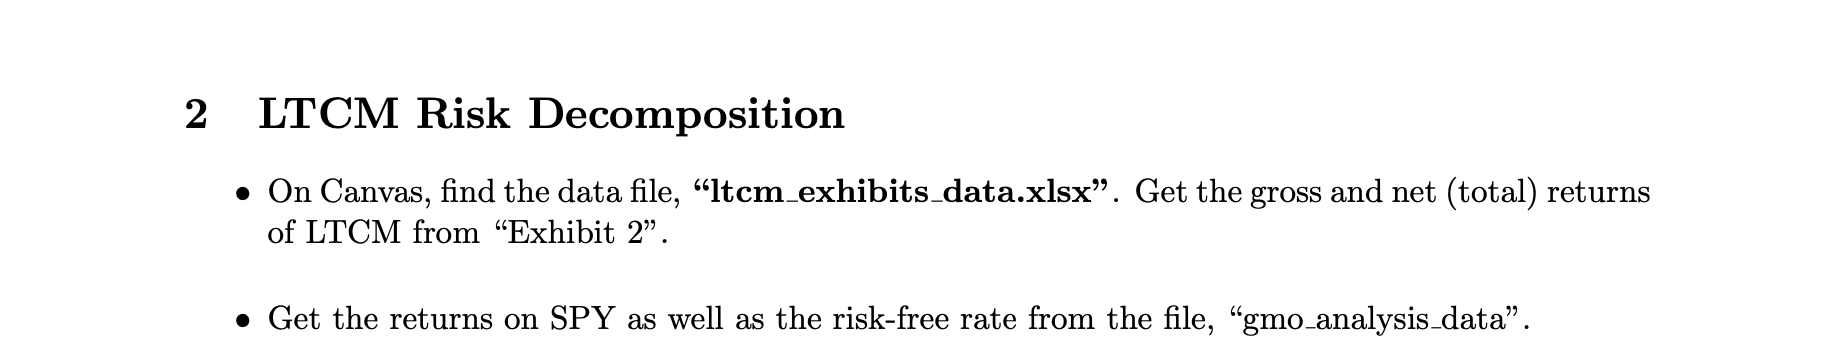

In [47]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

ltcm = pd.read_excel('ltcm_exhibits_data.xlsx', sheet_name="Exhibit 2",skiprows=2)
ltcm = ltcm.rename(columns={"Unnamed: 0": "Date"}).set_index('Date').dropna()

In [48]:
SPY = pd.read_excel('gmo_analysis_data.xlsx', sheet_name=2).rename({'Unnamed: 0': 'Date'}, axis=1).set_index('Date')
rf = pd.read_excel('gmo_analysis_data.xlsx', sheet_name=3).rename({'Unnamed: 0': 'Date'}, axis=1).set_index('Date')

SPY['rf'] = rf['US3M']
SPY_ex = SPY.subtract(SPY['rf'], axis=0)['SPY'].to_frame('SPY ex')

SPY_ex.head()

,SPY ex
Date,
1993-02-28,0.008159
1993-03-31,0.019949
1993-04-30,-0.028064
1993-05-31,0.024361
1993-06-30,0.001084


In [49]:
ltcm.index = SPY_ex.loc['1994-03':'1998-07'].index
ltcm = ltcm.join(rf).rename({'US3M': 'rf'}, axis=1)

ltcm.head()

,Fund Capital ($billions),Gross Monthly Performancea,Net Monthly Performanceb,Index of Net Performance,rf
Date,,,,,
1994-03-31,1.1,-0.011,-0.013,0.99,0.002967
1994-04-30,1.1,0.014,0.008,1.00,0.003308
1994-05-31,1.2,0.068,0.053,1.05,0.003592
1994-06-30,1.2,-0.039,-0.029,1.02,0.003550
1994-07-31,1.4,0.116,0.084,1.10,0.003658


In [50]:
ltcm_ex = ltcm.subtract(SPY['rf'], axis = 0).dropna().drop(columns = ['Index of Net Performance', 'rf'])
ltcm_ex['SPY (excess)'] = SPY_ex['SPY ex']
ltcm_ex.columns = ['Fund Capital ($billions)', 'Gross Performance (excess)', 'Net Performance (excess)', 'SPY (excess)']

ltcm_ex.head()

,Fund Capital ($billions),Gross Performance (excess),Net Performance (excess),SPY (excess)
Date,,,,
1994-03-31,1.097033,-0.013967,-0.015967,-0.044868
1994-04-30,1.096692,0.010692,0.004692,0.007904
1994-05-31,1.196408,0.064408,0.049408,0.012348
1994-06-30,1.196450,-0.042550,-0.032550,-0.026429
1994-07-31,1.396342,0.112342,0.080342,0.028668


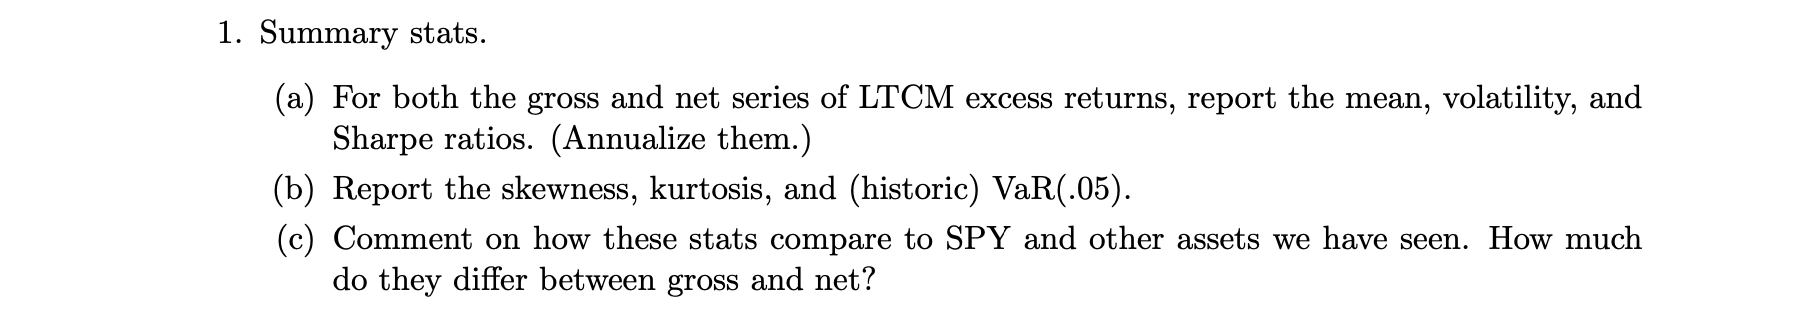

In [51]:
def summary_stats(df, annual_fac=12):
    stat_df = (df.mean()*annual_fac).to_frame('Mean')
    stat_df['Vol'] = df.std()*np.sqrt(annual_fac)
    stat_df['Sharpe'] = stat_df['Mean']/stat_df['Vol']
    
    return stat_df

def tail_risk_stats(df, annual_fac=12):
    tr_df = df.skew().to_frame('Skew')
    tr_df['Kurtosis'] = df.kurtosis()
    tr_df['VaR (0.05)'] = df.quantile(0.05)
    return tr_df

**(a)**

In [52]:
summary_stats(ltcm_ex[['Gross Performance (excess)','Net Performance (excess)','SPY (excess)']])

,Mean,Vol,Sharpe
Gross Performance (excess),0.242077,0.136232,1.776946
Net Performance (excess),0.155360,0.111765,1.390059
SPY (excess),0.173823,0.112294,1.547923


**(b)**

In [53]:
tail_risk_stats(ltcm_ex[['Gross Performance (excess)','Net Performance (excess)','SPY (excess)']])

,Skew,Kurtosis,VaR (0.05)
Gross Performance (excess),-0.287725,1.586625,-0.030445
Net Performance (excess),-0.810239,2.926921,-0.026415
SPY (excess),-0.433516,-0.362022,-0.046360


**(c)**

Comparing with SPY and other assets we have seen, in these stats, Sharpe is very high, volatility is similar to SPY. All the performance looks bad relative to SPY, particularly the tail-risk. 

The difference between Gross and Net is not too large. The net returns are lower, but given how high LTCM returns are, the net returns still deliver a good Sharpe and overall performance. 

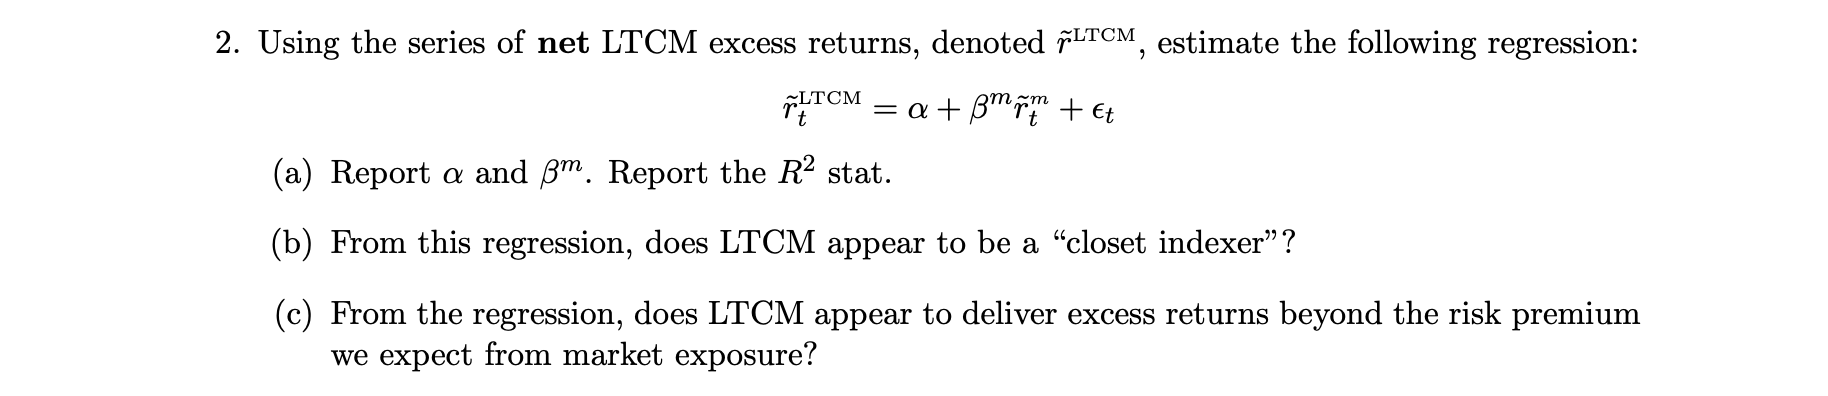

In [56]:
import statsmodels.api as sm

def regress(y, X, intercept = True, annual_fac=12):
    
    if intercept == True:
        X_ = sm.add_constant(X)
        reg = sm.OLS(y, X_).fit()
        reg_df = reg.params.to_frame('Regression Parameters')
        reg_df.loc[r'$R^{2}$'] = reg.rsquared
        reg_df.loc['const'] *= annual_fac
    else:
        reg = sm.OLS(y, X).fit()
        reg_df = reg.params.to_frame('Regression Parameters')
        reg_df.loc[r'$R^{2}$'] = reg.rsquared
    
    return reg_df

**(a)**

In [57]:
regress(ltcm_ex['Net Performance (excess)'], ltcm_ex['SPY (excess)']) 

,Regression Parameters
const,0.131527
SPY (excess),0.137114
$R^{2}$,0.018979


**(b)**

LTCM does not appear to be a "closer indexer", since beta is small, and the correlation to market is not large.

**(c)**

Yes, LTCM appears to deliver a large amount of excess returns beyond the risk premium we expect from market exposure. The alpha of the regression is large (13.15% annualized).

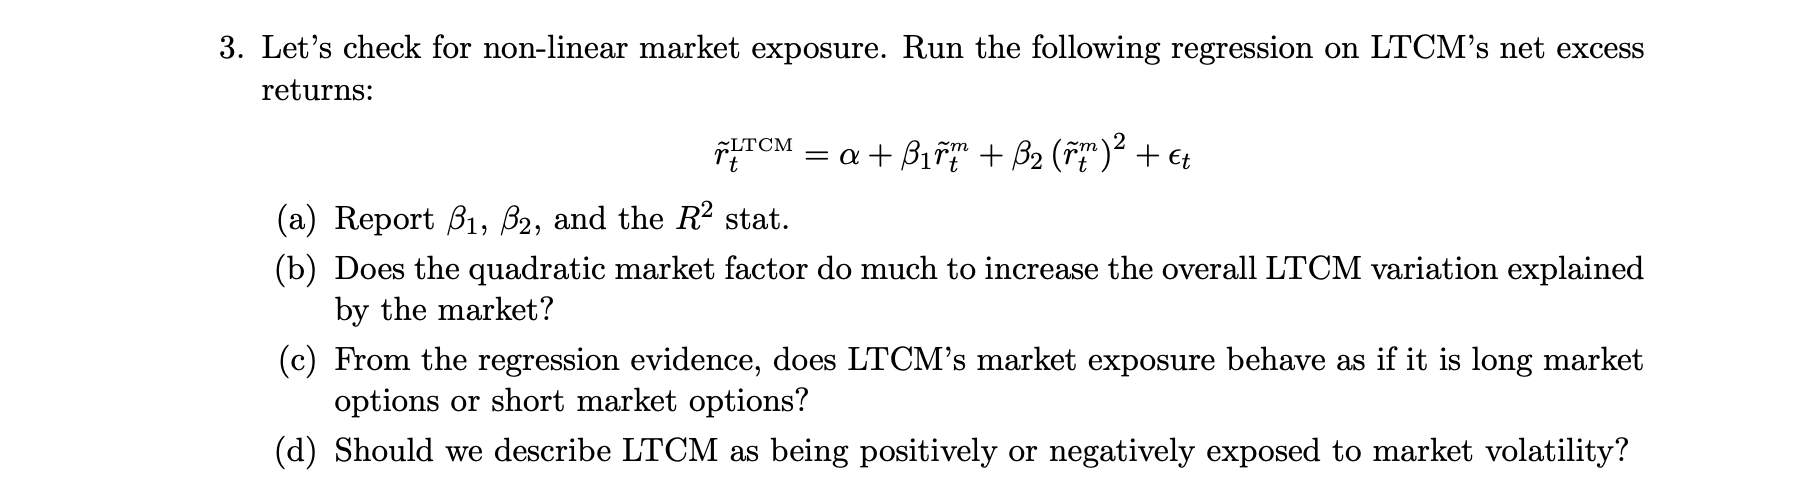

**(a)**

In [58]:
ltcm_ex['SPY (excess) squared'] = ltcm_ex['SPY (excess)'] **2
regress(ltcm_ex['Net Performance (excess)'], ltcm_ex[['SPY (excess)','SPY (excess) squared']]) 

,Regression Parameters
const,0.155042
SPY (excess),0.166878
SPY (excess) squared,-1.926746
$R^{2}$,0.024321


**(b)**

The quadratic market factor does not do much to increase the overall LTCM variation explained by the market, since quadratic market factor SPY does not add to R-squared significantly.

**(c)**

LTCM appears to be short market options because it has negative exposure to market volatility.

**(d)**

LTCM is negatively exposed to market volatility. Since to the degree it has quadratic exposure, it is negative, and LTCM underperforms particularly large SPY movements both on the upside and downside.

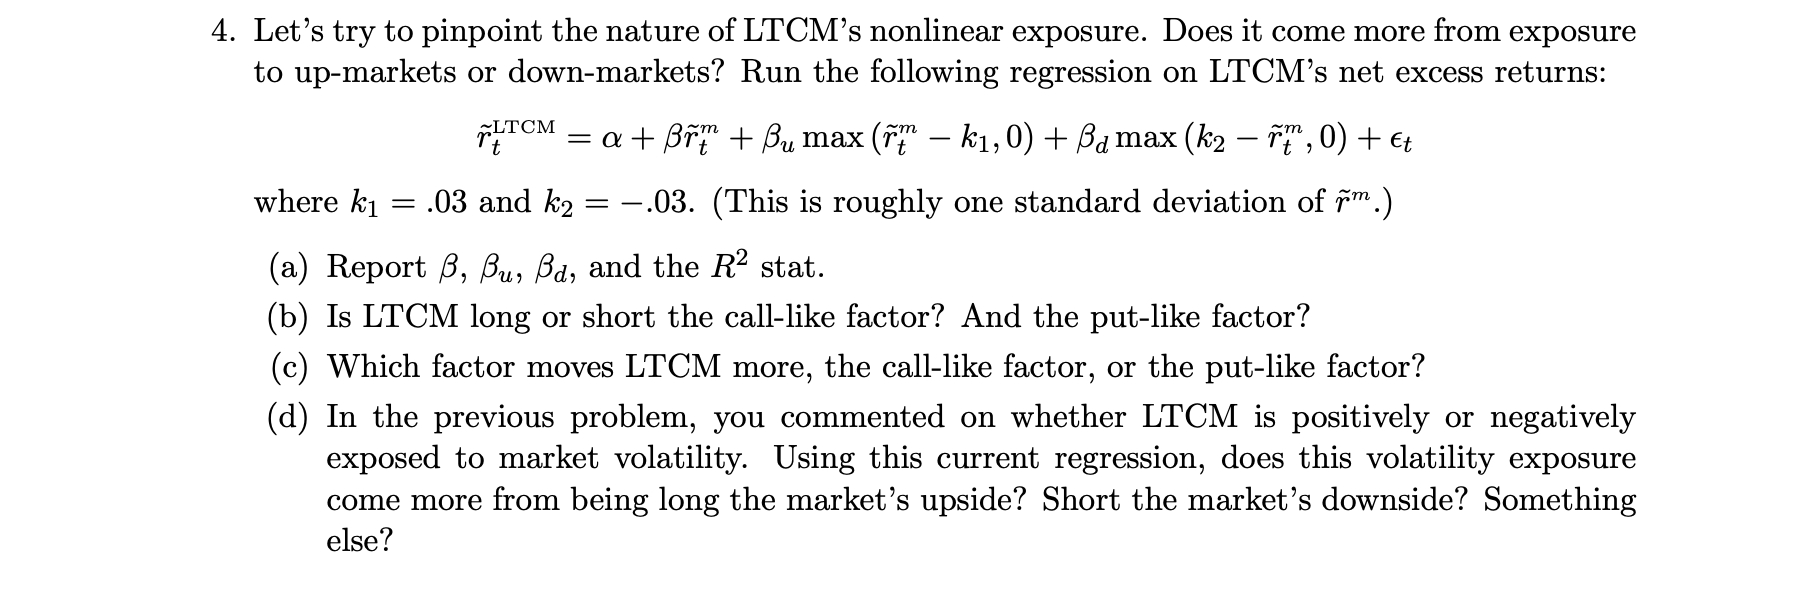

**(a)**

In [59]:
k1 = 0.03
k2 = -0.03

ltcm_ex['Up'] = (ltcm_ex['SPY (excess)'] - k1).clip(0)
ltcm_ex['Down'] = (k2 - ltcm_ex['SPY (excess)']).clip(0)

regress(ltcm_ex['Net Performance (excess)'], ltcm_ex[['SPY (excess)','Up','Down']])

,Regression Parameters
const,0.101231
SPY (excess),0.466610
Up,-0.782140
Down,1.289575
$R^{2}$,0.055486


**(b)**

LTCM appears short the call-like factor because the beta of up is negative.

LTCM appears long the put-like factor because the beta of down is positive.

**(c)**

The put-like factor moves LTCM more, since the magnitude of down beta is larger than up beta.

**(d)**

LTCM is negatively exposed to market volatility. This volatility exposure comes more from being short the market's upside, as LTCM is short the call-like factor and long the put-like factor.

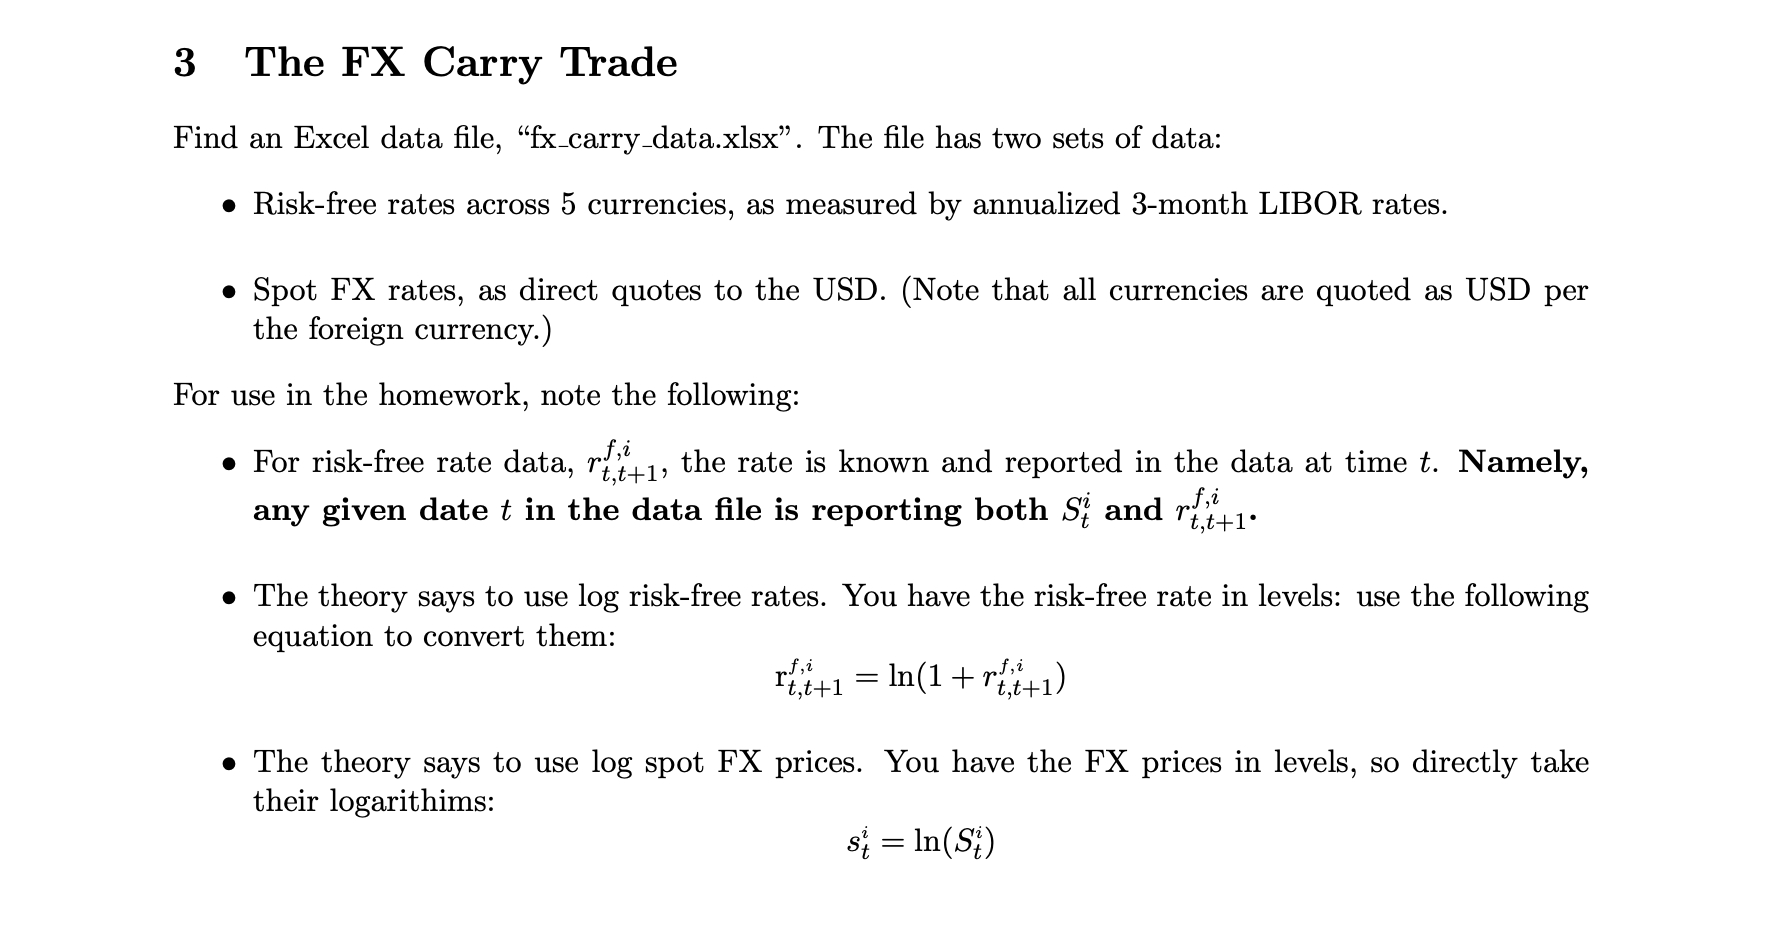

In [63]:
rf = pd.read_excel('fx_carry_data.xlsx', sheet_name = 1).set_index('DATE')
log_rf = np.log(1 + rf)

fx = pd.read_excel('fx_carry_data.xlsx', sheet_name = 2).set_index('DATE')
log_fx = np.log(fx)

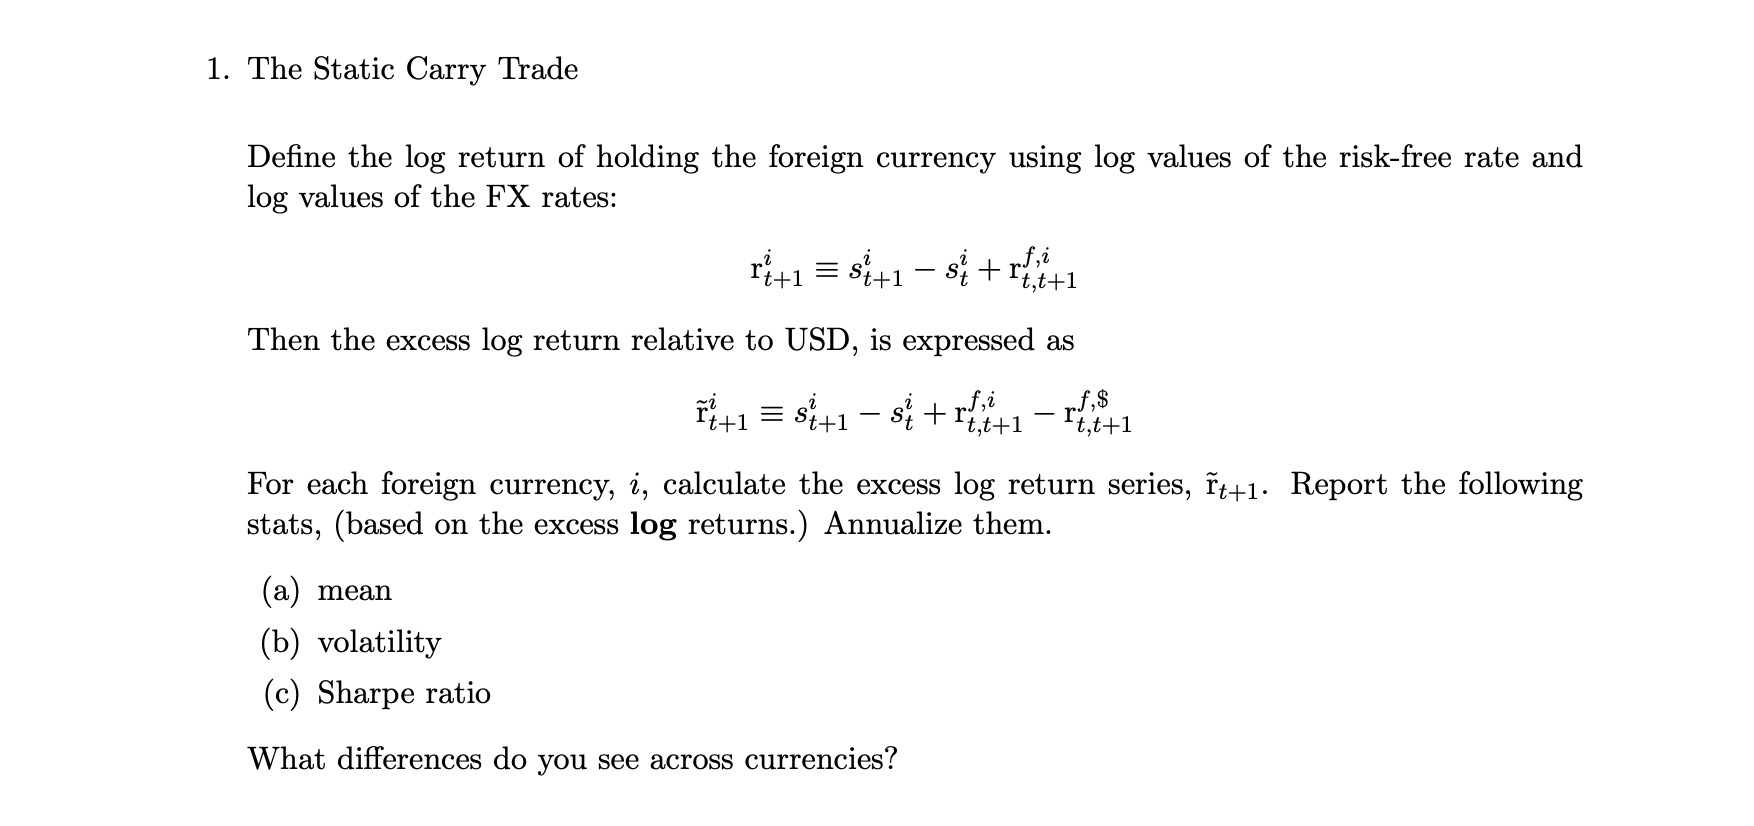

In [66]:
log_rf_ex = log_rf.subtract(log_rf['USD1M'], axis=0)[log_rf.columns[1:]]
log_rf_ex_col = log_rf_ex.copy()
log_rf_ex_col.columns = log_fx.columns

ret = (log_rf_ex_col.shift() + log_fx.diff()).dropna()
summary_stats(ret)

,Mean,Vol,Sharpe
USUK,-0.003502,0.086303,-0.040574
USEU,-0.004351,0.094714,-0.045944
USSZ,0.004312,0.098757,0.043662
USJP,-0.017415,0.091492,-0.190342


All the currency pairs have negative mean returns except the pair of USD and CHF(Swiss Franc). 


All the magnitude of mean returns are small except the pair of USD and JPY.

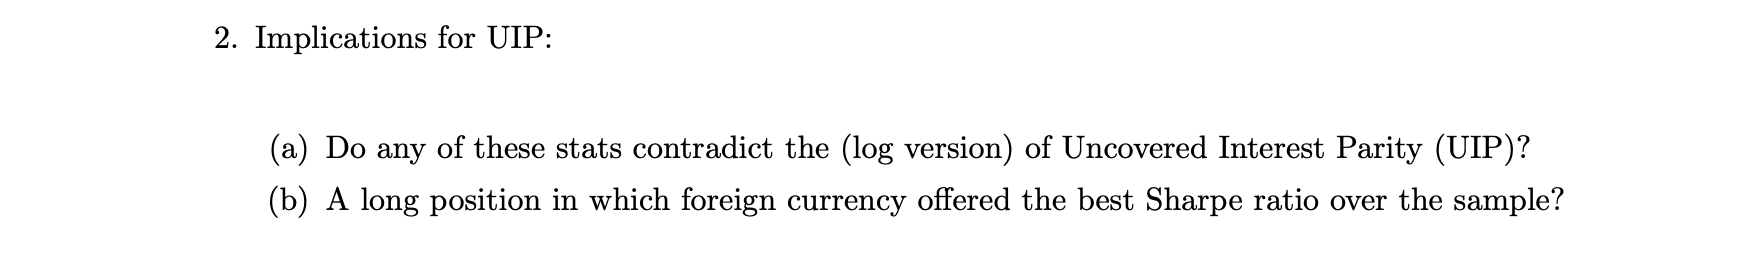

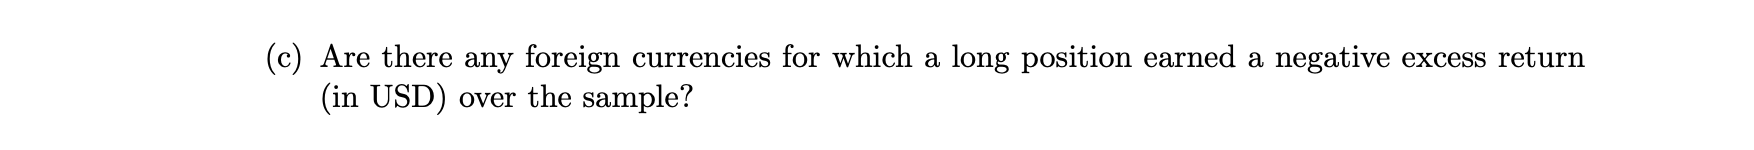

**(a)**

The stats contradict UIP. UIP implies that the mean excess return should be zero, while the USD and JPY trade seems to have a mean excess return significantly different from zero. The evidence from the other currencies is not clear. Their mean excess return is not exactly zero, but they are so close to zero that they may not be statistically significant.

**(b)**

Short JPY and long USD, which delivers the best Sharpe ratio.

**(c)**

A long position in three of the currencies had negative mean excess log returns.

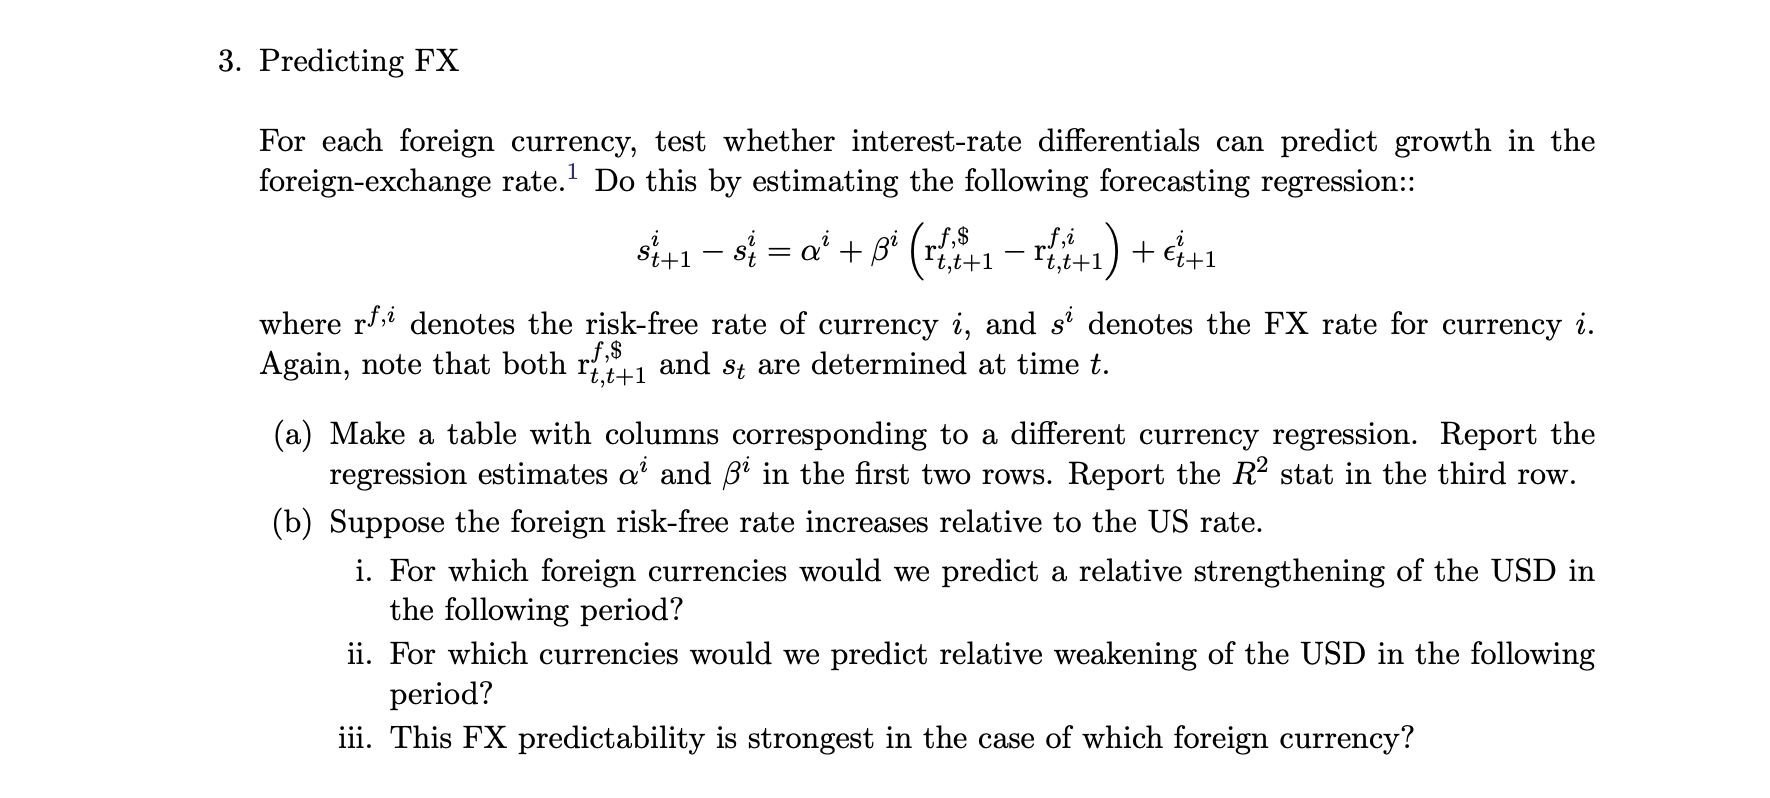

**(a)**

In [68]:
ys = log_fx.diff().dropna()
Xs = -log_rf_ex.shift().dropna()

fx_reg_pred = pd.DataFrame(data = None, index = [r'$\alpha^{i}$',r'$\beta^{i}$',r'$R^{2}$'])

for i in range(0,len(ys.columns)):
    fx_reg_pred[ys.columns[i]] = regress(ys[ys.columns[i]],Xs[Xs.columns[i]])['Regression Parameters'].values
    
fx_reg_pred

,USUK,USEU,USSZ,USJP
$\alpha^{i}$,-0.005868,0.007033,0.043574,-0.005996
$\beta^{i}$,0.485836,-1.256358,-1.646596,0.371473
$R^{2}$,0.000382,0.002610,0.003948,0.000501


**(b)**

To answer i. and ii., we first need to be aware that the risk free rate difference is decreasing based on the assumption in (b). Therefore, the currency with a more negative beta will be predicted to be strengthening and the currency with a more positive beta will be predicted to be weakening. 
In conclusion, the answer will be:

i. SZ 

ii. UK 

iii. The strongest predictability will be reflected by the R^2. Therefore, SZ has the largest R^2 and hence the strongest predictability.

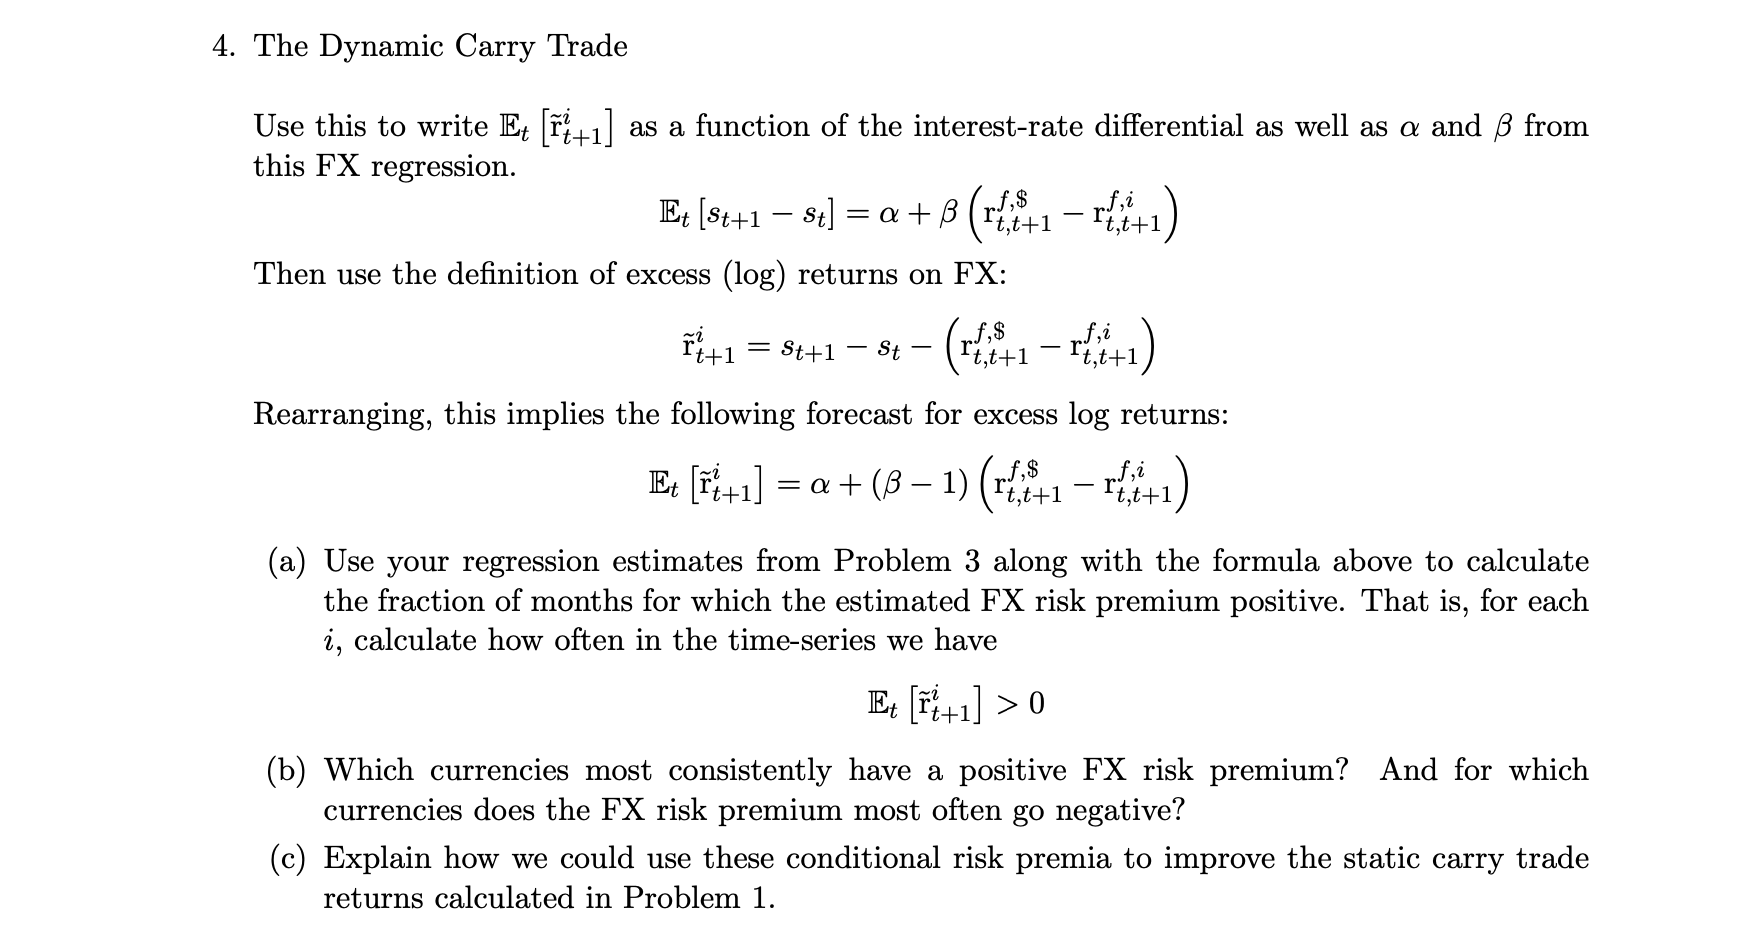

**(a)**

In [70]:
alphas = (fx_reg_pred.loc[r'$\alpha^{i}$'] / 12)
betas = fx_reg_pred.loc[r'$\beta^{i}$']
Xs.columns = fx_reg_pred.columns

ret_ex_forecast = alphas.values + ((betas - 1) * Xs)

In [71]:
month_frac = pd.DataFrame(data = None, columns = ret_ex_forecast.columns, index = ['% of Months'])

for col in ret_ex_forecast.columns:
    month_frac[col] = (len(ret_ex_forecast[ret_ex_forecast[col] > 0])/len(ret_ex_forecast)) * 100

ret_ex_forecast

month_frac

,USUK,USEU,USSZ,USJP
% of Months,23.809524,50.18315,63.003663,0.0


**(b)**

Though the static carry-trade of section 3.3 found that UK and EU have negative mean excess (log) returns, the dynamic carry trade finds that the time-varying forecast is often positive.

For JP, the forecast is negative throughout the sample due to the much higher interest rate in USD not being offset by appreciation of the Yen to the USD.

**(c)**

We could time the magnitude and direction of the currency trades instead of being passively 100% invested in a currency according to the evidence in 3.3. It is analagous to timing the trading of SPY according to the Earnings-Price Ratio instead of being passively 100% invested in SPY.